In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [10]:
train_data = pd.read_csv('zhengqi_train.txt',sep='\t',encoding='utf-8')
test_data = pd.read_csv('zhengqi_test.txt',sep='\t',encoding='utf-8')
from sklearn.decomposition import PCA

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
feature_columns = [col for col in train_data.columns if col not in ['target']]
min_max_scaler = min_max_scaler.fit(train_data[feature_columns])

train_data_scaler = min_max_scaler.transform(train_data[feature_columns])
test_data_scaler = min_max_scaler.transform(test_data[feature_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = feature_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = feature_columns

train_data_scaler['target'] = train_data['target']

display(train_data_scaler.describe())
display(test_data_scaler.describe())

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.690528,0.735521,0.593745,0.606301,0.639876,0.607801,0.735418,0.741337,0.702012,0.894246,...,0.401715,0.634030,0.760517,0.631794,0.459255,0.484465,0.734850,0.336306,0.527854,0.126353
std,0.143747,0.133738,0.145844,0.151302,0.119550,0.193919,0.141872,0.137111,0.129082,0.067047,...,0.141644,0.125338,0.110903,0.139979,0.099782,0.101353,0.122917,0.123733,0.153423,0.983966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.625465,0.695419,0.497279,0.515165,0.586328,0.497566,0.659249,0.682314,0.653453,0.878743,...,0.300053,0.586993,0.722656,0.565408,0.409037,0.454490,0.684936,0.279760,0.427112,-0.350250
50%,0.727076,0.766264,0.609155,0.609933,0.652940,0.642456,0.767115,0.774045,0.728557,0.909110,...,0.385611,0.633755,0.782330,0.634615,0.454518,0.499949,0.755580,0.349860,0.519532,0.313000
75%,0.783922,0.812642,0.694342,0.714174,0.712185,0.759266,0.835613,0.836958,0.781029,0.909110,...,0.488154,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414511,0.622210,0.793250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,...,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000
mean,0.642905,0.715637,0.477791,0.632726,0.635558,1.130681,0.664798,0.699688,0.637926,0.924091,...,0.313556,0.369132,0.614756,0.719928,0.623793,0.457349,0.482778,0.673164,0.326501,0.577034
std,0.166253,0.152936,0.155176,0.161379,0.154392,0.360555,0.162899,0.149311,0.156540,0.071306,...,0.149752,0.117538,0.156533,0.144621,0.175284,0.098071,0.100537,0.118082,0.132661,0.141870
min,-0.074195,-0.051989,-0.138124,0.106035,-0.024088,0.379633,-0.165817,-0.082831,-0.197059,0.429284,...,0.000000,0.066604,0.000000,-0.233613,-0.000620,0.000000,0.000000,-0.222222,0.000000,0.042836
25%,0.568618,0.663494,0.390845,0.516451,0.571256,0.862598,0.594035,0.651593,0.564653,0.878743,...,0.278919,0.279498,0.579211,0.683816,0.555366,0.412901,0.454490,0.666667,0.256819,0.482353
50%,0.681537,0.755256,0.504641,0.651177,0.654017,0.980532,0.694483,0.727247,0.675796,0.934346,...,0.280045,0.362120,0.627710,0.756987,0.652605,0.454518,0.499949,0.676518,0.342977,0.570437
75%,0.756506,0.811222,0.591869,0.740527,0.720226,1.538750,0.777778,0.798593,0.745856,0.969703,...,0.281593,0.451148,0.688438,0.804116,0.725806,0.500000,0.511365,0.755580,0.415371,0.667722
max,0.996747,1.028693,0.858835,1.022766,1.240345,2.005990,0.943285,0.924777,1.023497,1.030297,...,0.997889,0.792045,1.062535,0.925686,0.985112,1.000000,1.000000,0.918568,0.697043,1.003167


In [12]:
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16.loc[:,'target'] = train_data_scaler['target']
new_train_pca_16.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,target
count,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2.888000e+03,2888.000000
mean,-2.060369e-16,-1.217766e-16,-4.036476e-18,-4.071074e-17,4.405525e-17,5.287783e-17,-1.675137e-17,-2.068213e-17,-3.697220e-17,-1.374324e-18,-5.030878e-18,3.541046e-17,-1.753945e-17,1.212865e-17,-3.521585e-17,-6.490677e-17,0.126353
std,3.985421e-01,3.490520e-01,2.938955e-01,2.722600e-01,2.035064e-01,1.961281e-01,1.861363e-01,1.607591e-01,1.513411e-01,1.442443e-01,1.345876e-01,1.289250e-01,1.181146e-01,1.148696e-01,1.113404e-01,1.018260e-01,0.983966
min,-1.070204e+00,-9.382404e-01,-1.019585e+00,-6.853349e-01,-7.648504e-01,-5.531375e-01,-5.727524e-01,-5.914044e-01,-6.297702e-01,-4.842571e-01,-5.974398e-01,-5.775861e-01,-4.257264e-01,-4.576390e-01,-3.889404e-01,-3.658409e-01,-3.044000
25%,-2.802786e-01,-2.603790e-01,-2.062572e-01,-1.971748e-01,-1.250774e-01,-1.246340e-01,-1.256350e-01,-1.009687e-01,-9.717794e-02,-9.246243e-02,-8.373398e-02,-7.801039e-02,-7.325523e-02,-7.523584e-02,-7.163388e-02,-6.566027e-02,-0.350250
50%,-1.551054e-02,-8.985864e-03,-1.862128e-02,-2.277704e-02,-4.540760e-03,-1.473195e-02,1.080159e-04,-5.334855e-03,2.227036e-03,-2.132420e-03,5.955131e-03,-5.045296e-03,-7.584559e-03,7.251411e-05,-1.941010e-03,-9.753560e-04,0.313000
75%,2.275077e-01,2.322535e-01,2.133431e-01,1.680986e-01,1.236222e-01,1.020627e-01,1.271103e-01,9.692819e-02,1.005364e-01,9.122080e-02,8.494370e-02,7.160980e-02,6.872045e-02,7.940518e-02,6.910247e-02,6.287951e-02,0.793250
max,1.603357e+00,1.351733e+00,1.021067e+00,1.423139e+00,9.970009e-01,1.301563e+00,6.259220e-01,7.454771e-01,6.419831e-01,5.824712e-01,6.165939e-01,6.540782e-01,5.559426e-01,5.139520e-01,5.046488e-01,4.505847e-01,2.538000


In [13]:
from sklearn.model_selection import train_test_split
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

train_data, test_data, train_target, test_target = train_test_split(train,target,test_size=0.2,random_state=0)
train_data = np.array(train_data)
test_data = np.array(test_data)
train_target = np.array(train_target).reshape(-1,1)

In [14]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
train_data, test_data, train_target, test_target = train_test_split(train,target,test_size=0.2,random_state=0)
clf = lgb.LGBMRegressor(num_leaves=31)
paras = {'learning_rate':[0.01,0.1,1],'n_estimators':[20,40]}
clf = GridSearchCV(clf,paras,cv=5)
clf.fit(train_data,train_target)

y_pred = clf.predict(train_data)
score = mean_squared_error(y_pred,train_target)
print('RandomForestRegressor train score:',score)

y_pred = clf.predict(test_data)
score = mean_squared_error(y_pred,test_target)
print('RandomForestRegressor test score: ',score)
clf.best_params_

KeyboardInterrupt: 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR


In [ ]:
from sklearn.model_selection import LeavePOut
train_data, test_data, train_target, test_target = train_test_split(train,target,test_size=0.2,random_state=0)
lpo = LeavePOut(p=31)
num = 100
for k,(train_index,test_index) in enumerate(lpo.split(train_data)):
    train_data,test_data,train_target,test_target = train.values[train_index], train.values[test_index], target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000,tol=1e-3,penalty='L1',alpha=0.00001)
    clf.fit(train_data,train_target)
    
    y_pred = clf.predict(train_data)
    score = mean_squared_error(y_pred,train_target)
    print(k,'折,SGDRegressor train score:',score)

    y_pred = clf.predict(test_data)
    score = mean_squared_error(y_pred,test_target)
    print(k,'折,SGDRegressor test score: ',score,'\n')
    if k>10:
        break

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
train_data, test_data, train_target, test_target = train_test_split(train,target,test_size=0.2,random_state=0)
train_data = np.array(train_data)
test_data = np.array(test_data)
train_target = np.array(train_target).reshape(-1,1)
clf = KNeighborsRegressor(n_neighbors=3)
clf.fit(train_data,train_target)
y_pred = clf.predict(test_data)
score = mean_squared_error(y_pred,test_target)
print('KNN score: ',score)

In [ ]:
from sklearn.linear_model import LinearRegression
train_data, test_data, train_target, test_target = train_test_split(train,target,test_size=0.2,random_state=0)
train_data = np.array(train_data)
test_data = np.array(test_data)
train_target = np.array(train_target).reshape(-1,1)
clf = LinearRegression()
clf.fit(train_data,train_target)
y_pred = clf.predict(test_data)
score = mean_squared_error(y_pred,test_target)
print('Linear model score: ',score)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
train_data, test_data, train_target, test_target = train_test_split(train,target,test_size=0.2,random_state=0)
clf = DecisionTreeRegressor()
clf.fit(train_data,train_target)
y_pred = clf.predict(test_data)
score = mean_squared_error(y_pred,test_target)
print('Decision tree score: ',score)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
for k,(train_index,test_index) in enumerate(kf.split(train_data)):
    train_data,test_data,train_target,test_target = train.values[train_index], train.values[test_index], target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000,tol=1e-3,penalty='L1',alpha=0.00001)
    clf.fit(train_data,train_target)

    y_pred = clf.predict(train_data)
    score = mean_squared_error(y_pred,train_target)
    print(k,'折,SGDRegressor train score:',score)

    y_pred = clf.predict(test_data)
    score = mean_squared_error(y_pred,test_target)
    print(k,'折,SGDRegressor test score: ',score,'\n')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train.values[train_index], train.values[test_index], target[train_index],target[test_index]
randomForestRegressor = RandomForestRegressor()
paras = {'n_estimators':[50,100,200,300],'max_depth':[1,2,3,4,5]}

clf = RandomizedSearchCV(randomForestRegressor,paras,cv=5)
clf.fit(train_data,train_target)

y_pred = clf.predict(train_data)
score = mean_squared_error(y_pred,train_target)
print('RandomForestRegressor train score:',score)

y_pred = clf.predict(test_data)
score = mean_squared_error(y_pred,test_target)
print('RandomForestRegressor test score: ',score)
sorted(clf.cv_results_.keys())

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train.values[train_index], train.values[test_index], target[train_index],target[test_index]
randomForestRegressor = RandomForestRegressor()
paras = {'n_estimators':[50,100,200,300],'max_depth':[1,2,3,4,5]}

clf = GridSearchCV(randomForestRegressor,paras,cv=5)
clf.fit(train_data,train_target)

y_pred = clf.predict(train_data)
score = mean_squared_error(y_pred,train_target)
print('RandomForestRegressor train score:',score)

y_pred = clf.predict(test_data)
score = mean_squared_error(y_pred,test_target)
print('RandomForestRegressor test score: ',score)
sorted(clf.cv_results_.keys())

NameError: name 'train_index' is not defined

In [16]:
train_data2 = pd.read_csv('./zhengqi_train.txt',sep='\t')
test_data2 = pd.read_csv('./zhengqi_test.txt',sep='\t')
train_data2_f = train_data2[test_data2.columns].values
train_data2_target = train_data2['target'].values

from sklearn.model_selection import KFold
import lightgbm as lgb
import numpy as np

k = 5
kf = KFold(n_splits=k,shuffle=True,random_state=2019)

MSE_DICT = {'train_mse':[],'test_mse':[]}

for i,(train_index,test_index) in enumerate(kf.split(train_data2)):
    lgb_reg = lgb.LGBMRegressor(learning_rate=0.01,
                                max_depth=-1,
                               n_estimators=500,
                               boosting_type='gbdt',
                               random_state=2019,
                               objective='regression')
    
    X_train_KFold,X_test_KFold = train_data2_f[train_index], train_data2_f[test_index],
    y_train_KFold,y_test_Fold = train_data2_target[train_index],train_data2_target[test_index]
    lgb_reg.fit(X=X_train_KFold,
               y=y_train_KFold,
               eval_set=[(X_train_KFold,y_train_KFold),(X_test_KFold,y_test_Fold)],
               eval_names=['Train','Test'],
               early_stopping_rounds=100,
               eval_metric='MSE',
               verbose=50)
    
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_)
    
    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i+1))
    train_mse = mean_squared_error(y_train_KFold_predict,y_train_KFold)
    print('-'*5,'\n','训练MSE\n',train_mse,'\n','-'*5)
    
    test_mse = mean_squared_error(y_test_KFold_predict,y_test_Fold)
    print('-'*5,'\n','预测MSE\n',test_mse,'\n','-'*5)
    
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
    print('-'*5,'\n','训练MSE\n',MSE_DICT['train_mse'],'\n',np.mean(MSE_DICT['train_mse']),'-'*5)
    print('-'*5,'\n','预测MSE\n',MSE_DICT['test_mse'],'\n',np.mean(MSE_DICT['test_mse']),'-'*5)
    
    
    
    
    

Training until validation scores don't improve for 100 rounds
[50]	Train's l2: 0.428458	Test's l2: 0.466965
[100]	Train's l2: 0.221807	Test's l2: 0.263431


KeyboardInterrupt: 

[ 231  750 1270 1790 2310]
[[0.91086214 0.90533772 0.86297199 0.90728524 0.87502487 0.87433574
  0.89399558 0.892268   0.85143527 0.90177793 0.85378305 0.90108121
  0.86546403 0.88245297 0.89680929 0.91057746 0.88591665 0.88512637
  0.87115564 0.89453994 0.92283948 0.88860428 0.86592999 0.90972434
  0.92375515 0.88093135 0.93000558 0.86693397 0.89573055 0.90409242
  0.92307623 0.91282857 0.90088129 0.87474589 0.8924011  0.89758722
  0.89556375 0.9001606  0.91428542 0.89643977 0.90691454 0.90584055
  0.90026762 0.85513863 0.92208972 0.8803028  0.91215471 0.89489055
  0.89699622 0.88206519 0.88102464 0.9019573  0.90508671 0.88237647
  0.86296054 0.88827439 0.90879037 0.89223408 0.88704527 0.88889392
  0.87468576 0.90990854 0.91726718 0.87041902 0.90525834 0.86674518
  0.8923472  0.88906641 0.89650687 0.89864369 0.87369397 0.89469752
  0.90643901 0.89596672 0.86856893 0.88919602 0.89861941 0.84669411
  0.88708792 0.84563574 0.89230603 0.89945708 0.91409452 0.88723584
  0.90472596 0.894372

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

<Figure size 2700x1500 with 0 Axes>

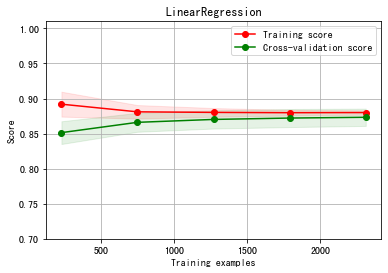

In [17]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import learning_curve

plt.figure(figsize=(18,10),dpi=150)

def plot_learning_curve(estimator,title,X,y,ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1,1.0,5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes,train_scores,test_scores=learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    print(train_sizes)
    print(train_scores)
    print(test_scores)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    
    test_scores_mean = np.mean(test_scores,axis=1)
    test_scores_std = np.std(test_scores,axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes,
                    train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std,
                    alpha=0.1,
                    color='r')
    
    plt.fill_between(train_sizes,
                    test_scores_mean-test_scores_std,
                    test_scores_mean+test_scores_std,
                    alpha=0.1,
                    color='g')
    plt.plot(train_sizes,
            train_scores_mean,
            'o-',
            color='r',
            label='Training score')
    plt.plot(train_sizes,
            test_scores_mean,
            'o-',
            color='g',
            label='Cross-validation score')
    plt.legend(loc='best')
    return plt

X = train_data2[test_data2.columns].values
y = train_data2['target'].values

title = 'LinearRegression'
cv = ShuffleSplit(n_splits=100,test_size=0.2,random_state=0)
estimator = SGDRegressor()

plot_learning_curve(estimator,title,X,y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)

In [18]:
import pandas as pd
pd.DataFrame(pd.Series({1:2}).reset_index())

,index,0
0,1,2


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

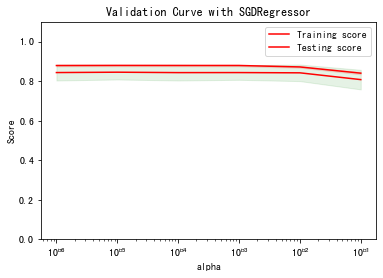

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import validation_curve

para_range = [0.1,0.01,0.001,0.0001,0.00001,0.000001]

train_scores, test_scores = validation_curve(SGDRegressor(max_iter=1000,tol=1e-3,penalty='L1'),
                                            X,
                                            y,
                                            param_name='alpha',
                                            param_range=para_range,
                                            cv=10,
                                            scoring='r2',
                                            n_jobs=-1)

train_scores_mean = np.mean(train_scores,axis=1)
train_scores_std = np.std(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
test_scores_std = np.std(test_scores,axis=1)

plt.title('Validation Curve with SGDRegressor')
plt.xlabel('alpha')
plt.ylabel('Score')
plt.ylim(0.0,1.1)
plt.semilogx(para_range,train_scores_mean,label='Training score',color='r')

plt.fill_between(para_range,
                    train_scores_mean-train_scores_std,
                    train_scores_mean+train_scores_std,
                    alpha=0.1,
                    color='r')

plt.semilogx(para_range,test_scores_mean,label='Testing score',color='r')
plt.fill_between(para_range,
                test_scores_mean-test_scores_std,
                test_scores_mean+test_scores_std,
                alpha=0.1,
                color='g')
plt.legend(loc='best')
plt.show()



In [23]:
train_data = pd.read_csv('zhengqi_train.txt',sep='\t',encoding='utf-8')
test_data = pd.read_csv('zhengqi_test.txt',sep='\t',encoding='utf-8')
epsilon = 1e-5
func_dict = {
    'add':lambda x,y: x+y,
    'mins':lambda x,y:x-y,
    'div':lambda x,y: x/(y+epsilon),
    'multi':lambda x,y:x*y,
}

In [24]:
def auto_feature_make(train_data,test_data,func_dict,col_list):
    train_data, test_data  = train_data.copy(), test_data.copy()
    for col_i in col_list:
        for col_j in col_list:
            for func_name, func in func_dict.items():
                for data in [train_data,test_data]:
                    func_features = func(data[col_i],data[col_j])
                    col_func_features = '-'.join([col_i, func_name, col_j])
                    data[col_func_features] = func_features
    return train_data, test_data

In [26]:
train_data2, test_data2 = auto_feature_make(train_data, test_data, func_dict,test_data.columns)

In [27]:
train_data2.head(), test_data2.head()

(      V0     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
 0  0.566  0.016 -0.143  0.407  0.452 -0.901 -1.812 -2.360 -0.436 -2.114  ...   
 1  0.968  0.437  0.066  0.566  0.194 -0.893 -1.566 -2.360  0.332 -2.114  ...   
 2  1.013  0.568  0.235  0.370  0.112 -0.797 -1.367 -2.360  0.396 -2.114  ...   
 3  0.733  0.368  0.283  0.165  0.599 -0.679 -1.200 -2.086  0.403 -2.114  ...   
 4  0.684  0.638  0.260  0.209  0.337 -0.454 -1.073 -2.086  0.314 -2.114  ...   
 
    V37-div-V35  V37-multi-V35  V37-add-V36  V37-mins-V36  V37-div-V36  \
 0     0.687710      17.894308       -6.116        -0.900     1.345097   
 1    -2.005439      -0.265720       -1.065        -0.395     2.179170   
 2    -1.618087      -0.214396        0.176        -1.354    -0.769925   
 3    -0.307684      -0.040768        0.221        -0.445    -0.336326   
 4    -0.076921      -0.010192       -0.308         0.252     0.100004   
 
    V37-multi-V36  V37-add-V37  V37-mins-V37  V37-div-V37  V37-mul

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=500)
train_data2_pca = pca.fit_transform(train_data2.iloc[:,0:-1])
test_data2_pca = pca.transform(test_data2)
train_data2_pca = pd.DataFrame(train_data2_pca)
test_data2_pca = pd.DataFrame(test_data2_pca)

train_data2_pca['target'] = train_data2['target']
X_train2 = train_data2[test_data2.columns].values
y_train = train_data2['target']

In [30]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import numpy as np

Folds = 5
kf = KFold(n_splits=5,shuffle=True,random_state=2019)

MSE_DICT = {'train_mse':[], 'test_mse': []}

# 线下训练模型
for i, (train_index,test_index) in enumerate(kf.split(X_train2)):
    # LGB 树模型
    lgb_reg = lgb.LGBMRegressor(
        learning_rate=0.01,
        max_depth=-1,
        n_estimators=5000,
        boosting_type='gbdt',
        random_state=2019,
        objective = 'regression'
    )

    # 切分训练集和预测及
    X_train_KFold,X_test_KFold = X_train2[train_index], X_train2[test_index],
    y_train_KFold,y_test_Fold = y_train[train_index],y_train[test_index]
    
    lgb_reg.fit(X=X_train_KFold,
               y=y_train_KFold,
               eval_set=[(X_train_KFold,y_train_KFold),(X_test_KFold,y_test_Fold)],
               eval_names=['Train','Test'],
               early_stopping_rounds=100,
               eval_metric='MSE',
               verbose=50)
    
    y_train_KFold_predict = lgb_reg.predict(X_train_KFold,num_iteration=lgb_reg.best_iteration_)
    y_test_KFold_predict = lgb_reg.predict(X_test_KFold,num_iteration=lgb_reg.best_iteration_)
    
    print('第{}折 训练和预测 训练MSE 预测MSE'.format(i+1))
    train_mse = mean_squared_error(y_train_KFold_predict,y_train_KFold)
    print('-'*5,'\n','训练MSE\n',train_mse,'\n','-'*5)
    
    test_mse = mean_squared_error(y_test_KFold_predict,y_test_Fold)
    print('-'*5,'\n','预测MSE\n',test_mse,'\n','-'*5)
    
    MSE_DICT['train_mse'].append(train_mse)
    MSE_DICT['test_mse'].append(test_mse)
    print('-'*5,'\n','训练MSE\n',MSE_DICT['train_mse'],'\n',np.mean(MSE_DICT['train_mse']),'-'*5)
    print('-'*5,'\n','预测MSE\n',MSE_DICT['test_mse'],'\n',np.mean(MSE_DICT['test_mse']),'-'*5)
    
    
    
    
    


Training until validation scores don't improve for 100 rounds


KeyboardInterrupt: 

In [31]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [32]:
def get_training_data():
    # 提取训练样本
    from sklearn.model_selection import train_test_split
    df_train = data_all[data_all['origin']=='train']
    df_train['label'] = data_train.target1
    
    y = df_train.target
    X = df_train.drop(['origin','target','label'],axis=1)
    X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3,random_state=100)
    return X_train, X_valid, y_train, y_valid

def get_test_data():
    df_test = data_all[data_all['origin']=='test'].reset_index(drop=True)
    return df_test.drop(['origin','target'],axis=1)


In [33]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)
    n = len(y_pred)
    return np.sqrt(sum_sq/n)

def mse(y_true,y_pred):
    return mean_squared_error(y_true,y_pred)

rmse_scorer = make_scorer(rmse,greater_is_better=False)
mse_score = make_scorer(mse,greater_is_better=False)

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 575 out of 575 | elapsed:    8.4s finished


    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.278062      0.102867         0.001046        0.000816        0.25   
1        0.087531      0.114028         0.000861        0.000591         0.5   
2        0.002680      0.000178         0.000669        0.000046        0.75   
3        0.002687      0.000149         0.000673        0.000027           1   
4        0.002695      0.000134         0.000671        0.000030        1.25   
5        0.002709      0.000107         0.000668        0.000032         1.5   
6        0.002679      0.000129         0.000665        0.000040        1.75   
7        0.002680      0.000137         0.000679        0.000065           2   
8        0.002665      0.000079         0.000667        0.000028        2.25   
9        0.002697      0.000149         0.000665        0.000031         2.5   
10       0.002725      0.000122         0.000657        0.000033        2.75   
11       0.002758      0.000357         

Text(0, 0.5, 'score')

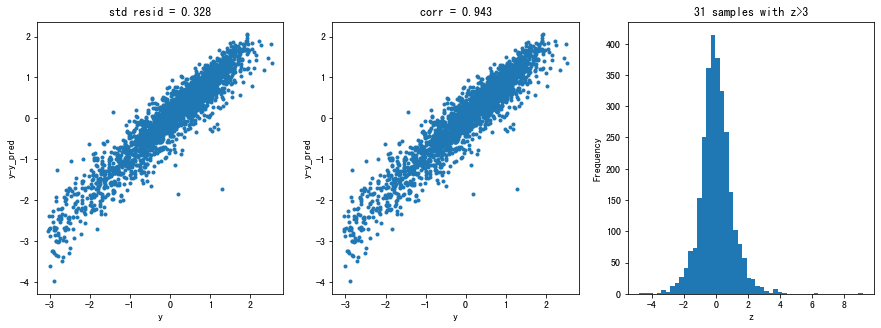

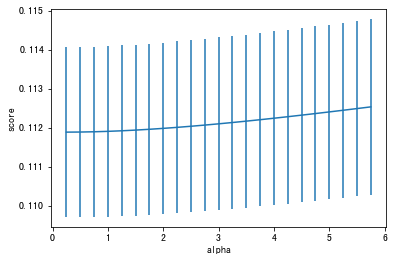

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
def train_model(model,param_grid=[],X=[],y=[],splits=5,repeats=5):
    if len(y) == 0:
        X, y =get_training_data_omiteroutliers()
    
    rkfold = RepeatedKFold(n_splits=splits,n_repeats=repeats)
    if len(param_grid)>0:
        gsearch = GridSearchCV(model,
                              param_grid,
                              cv=rkfold,
                              scoring='neg_mean_squared_error',
                              verbose=1,
                              return_train_score=True,
                              n_jobs=-1)
        
        gsearch.fit(X,y)
        
        model = gsearch.best_estimator_
        best_idx = gsearch.best_index_
#         print(best_idx)
        grid_results = pd.DataFrame(gsearch.cv_results_)
        print(grid_results)
        cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
        cv_std = grid_results.loc[best_idx,'std_test_score']
        
    else:
        grid_results = []
        cv_results = cross_val_score(model,
                                    X,
                                    y,
                                    scoring='neg_mean_squared_error',
                                    cv=rkfold
                                    )
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)
        
    cv_score = pd.Series({'mean':cv_mean,'std':cv_std})

    y_pred = model.predict(X)
    print('-'*15)
    print(model)
    print('-'*15)
    print('score',model.score(X,y))
    print('rmse',rmse(y,y_pred))

    print('mse=',mse(y,y_pred))
    print('cross_val:mean=',cv_mean,'std=',cv_std)

    y_pred = pd.Series(y_pred)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid)/std_resid
    n_outliers = sum(abs(z)>3)

    plt.figure(figsize=(15,5))
    ax_131 = plt.subplot(1,3,1)
    plt.plot(y,y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y-y_pred')
    plt.title('std resid = {:.3f}'.format(std_resid))
    
    ax_132 = plt.subplot(1,3,2)
    plt.plot(y,y_pred,'.')
    plt.xlabel('y')
    plt.ylabel('y-y_pred')
    plt.title('corr = {:.3f}'.format(np.corrcoef(y_pred,y)[0][1]))

    ax_133 = plt.subplot(1,3,3)
    z.plot.hist(bins=50,ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))

    return model,cv_score,grid_results
    
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])

splits=5


repeats=5

model = 'Ridge'

opt_models[model] = Ridge()
alpha_range= np.arange(0.25,6,0.25)
param_grid = {'alpha':alpha_range}

opt_models[model], cv_score, grid_results = train_model(opt_models[model],X=X,y=y,
                                                       param_grid=param_grid,
                                                       splits=splits,repeats=repeats)
cv_score.name = model
score_models = score_models.append(cv_score)

# print(X.shape,y.shape)
plt.figure()
plt.errorbar(alpha_range,abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats)
            )
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 25 folds for each of 23 candidates, totalling 575 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 575 out of 575 | elapsed:   20.9s finished


---------------
Lasso(alpha=0.0003800000000000001, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
---------------
score 0.8890168729960003
rmse 0.3277428561552724
mse= 0.10741537976081542
cross_val:mean= 0.11227712220346872 std= 0.01377419484274488


Text(0, 0.5, 'score')

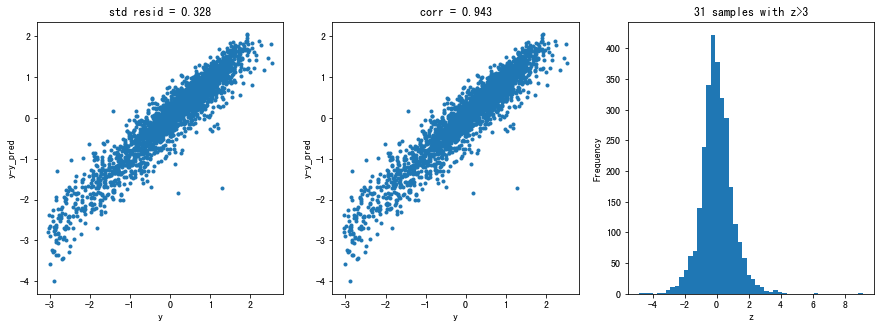

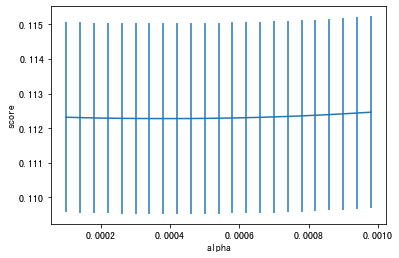

In [47]:
model = 'Lasso'
from sklearn.linear_model import Lasso
opt_models[model] = Lasso()
alpha_range= np.arange(1e-4,1e-3,4e-5)
param_grid = {'alpha':alpha_range}

opt_models[model], cv_score, grid_results = train_model(opt_models[model],X=X,y=y,
                                                       param_grid=param_grid,
                                                       splits=splits,repeats=repeats)
cv_score.name = model
score_models = score_models.append(cv_score)

# print(X.shape,y.shape)
plt.figure()
plt.errorbar(alpha_range,abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats)
            )
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 25 folds for each of 207 candidates, totalling 5175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 3008 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 4808 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 5112 out of 5175 | elapsed:   40.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 5175 out of 5175 | elapsed:   40.7s finished


---------------
ElasticNet(alpha=0.0003400000000000001, copy_X=True, fit_intercept=True,
           l1_ratio=0.9, max_iter=100000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)
---------------
score 0.8890437099597437
rmse 0.3277032278118945
mse= 0.10738940551833417
cross_val:mean= 0.11163435088618488 std= 0.011064198120279834


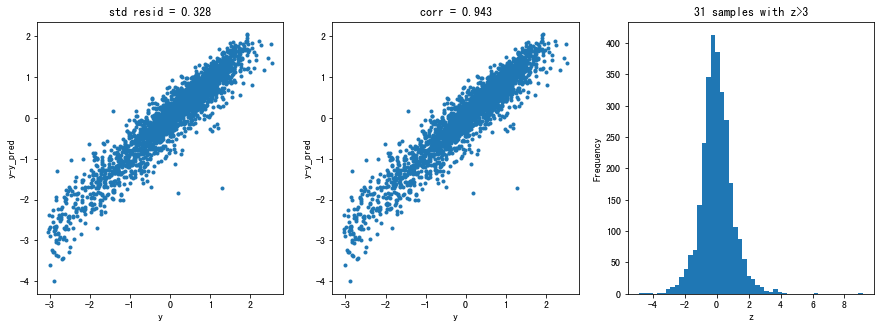

In [41]:
from sklearn.linear_model import ElasticNet
model = 'ElasticNet'
opt_models[model] = ElasticNet()
alpha_range= np.arange(1e-4,1e-3,4e-5)
param_grid = {'alpha':alpha_range,
             'l1_ratio':np.arange(0.1,1.0,0.1),
              'max_iter':[100000]
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model],X=X,y=y,
                                                       param_grid=param_grid,
                                                       splits=splits,repeats=repeats)
cv_score.name = model
score_models = score_models.append(cv_score)

# print(X.shape,y.shape)
# plt.figure()
# plt.errorbar(alpha_range,abs(grid_results['mean_test_score']),
#              abs(grid_results['std_test_score'])/np.sqrt(splits*repeats)
#             )
# plt.xlabel('alpha')
# plt.ylabel('score')

Fitting 25 folds for each of 9 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    7.4s finished


---------------
LinearSVR(C=0.5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)
---------------
score 0.8872905137222888
rmse 0.3302820645875921
mse= 0.10908624218824216
cross_val:mean= 0.11234714823614368 std= 0.010575922675185494


Text(0, 0.5, 'score')

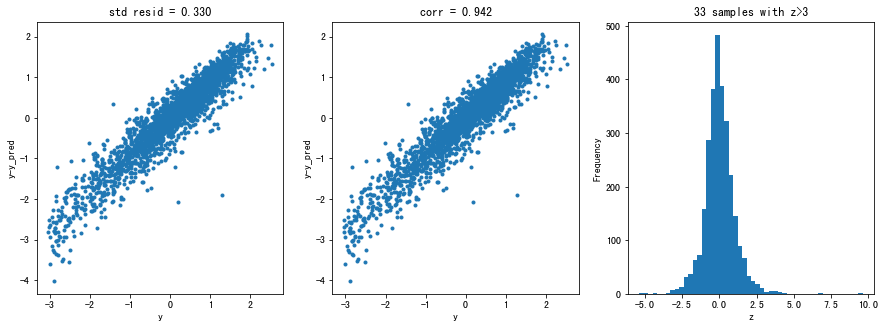

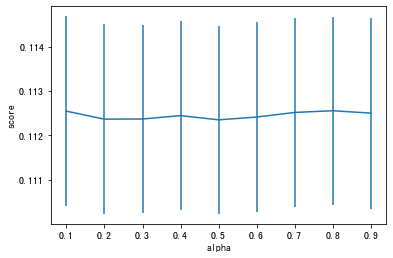

In [43]:
from sklearn.svm import LinearSVR
model = 'LinearSVR'
opt_models[model] = LinearSVR()
crange= np.arange(0.1,1.0,0.1)
param_grid = {'C':crange,
              'max_iter':[1000]
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model],X=X,y=y,
                                                       param_grid=param_grid,
                                                       splits=splits,repeats=repeats)
cv_score.name = model
score_models = score_models.append(cv_score)
plt.figure()
plt.errorbar(crange,abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats)
            )
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 25 folds for each of 8 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   14.8s finished


---------------
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
---------------
score 0.8693661564134381
rmse 0.35557613755472667
mse= 0.12643438959833794
cross_val:mean= 0.20178458404228053 std= 0.014588633315777486


Text(0, 0.5, 'score')

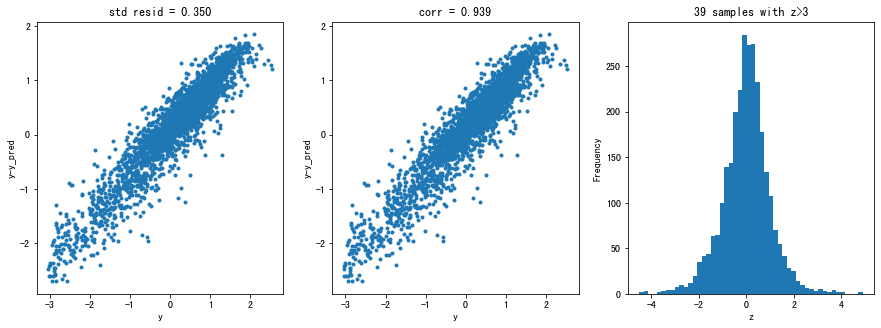

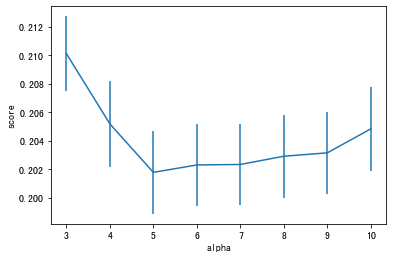

In [45]:
from sklearn.neighbors import KNeighborsRegressor
model = 'KNeighbors'
opt_models[model] = KNeighborsRegressor()

param_grid = {'n_neighbors':np.arange(3,11,1),
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model],X=X,y=y,
                                                       param_grid=param_grid,
                                                       splits=splits,repeats=repeats)
cv_score.name = model
score_models = score_models.append(cv_score)
plt.figure()
plt.errorbar(np.arange(3,11,1),abs(grid_results['mean_test_score']),
             abs(grid_results['std_test_score'])/np.sqrt(splits*repeats)
            )
plt.xlabel('alpha')
plt.ylabel('score')

Fitting 25 folds for each of 27 candidates, totalling 675 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 675 out of 675 | elapsed:  5.1min finished


---------------
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=350,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
---------------
score 0.9631546058589877
rmse 0.1888410292611152
mse= 0.03566093433239739
cross_val:mean= 0.11286093376383965 std= 0.00853676586980915


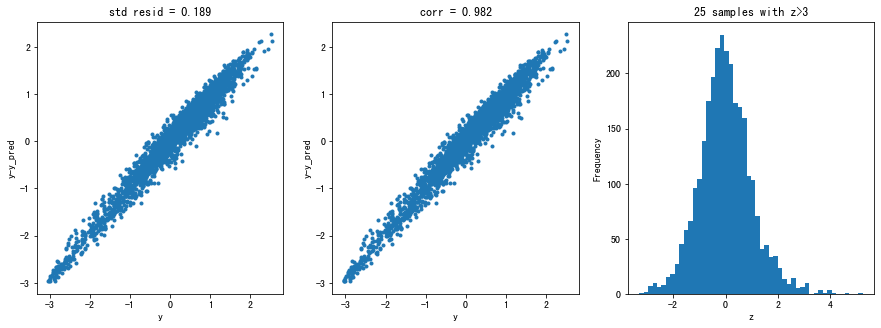

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
model = 'GradientBoosting'
opt_models[model] = GradientBoostingRegressor()

param_grid = {'n_estimators':[150,250,350],
              'max_depth':[1,2,3],
              'min_samples_split':[5,6,7]
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model],X=X,y=y,
                                                       param_grid=param_grid,
                                                       splits=splits,repeats=repeats)
cv_score.name = model
score_models = score_models.append(cv_score)
# plt.figure()
# plt.errorbar(np.arange(3,11,1),abs(grid_results['mean_test_score']),
#              abs(grid_results['std_test_score'])/np.sqrt(splits*repeats)
#             )
# plt.xlabel('alpha')
# plt.ylabel('score')

Fitting 25 folds for each of 25 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  2.5min finished


---------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
---------------
score 0.9774053547896528
rmse 0.14787934513293158
mse= 0.021868300716944712
cross_val:mean= 0.11918463541683226 std= 0.009404302801715014


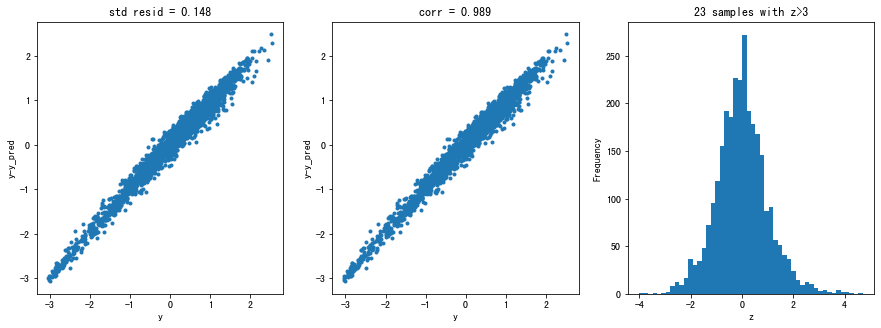

In [51]:
from xgboost import XGBRegressor
model = 'XGB'
opt_models[model] = XGBRegressor()

param_grid = {'n_estimators':[100,200,300,400,500],
              'max_depth':[1,2,3,4,5],
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model],X=X,y=y,
                                                       param_grid=param_grid,
                                                       splits=splits,repeats=repeats)
cv_score.name = model
score_models = score_models.append(cv_score)

Fitting 25 folds for each of 45 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  7.6min finished


    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        4.512560      0.789826         0.056035        0.021340   
1        7.312851      1.208144         0.107263        0.030955   
2       10.129352      1.941468         0.140482        0.043601   
3        4.197336      0.732441         0.050302        0.016401   
4        6.763134      1.281776         0.087522        0.025998   
5        9.341677      1.504612         0.115036        0.035338   
6        3.785583      0.727744         0.041873        0.012893   
7        6.682161      0.905499         0.074495        0.024248   
8        8.949048      1.847498         0.097681        0.029885   
9        6.120426      1.369662         0.059732        0.019976   
10      10.223631      1.460402         0.102158        0.028197   
11      13.977114      1.779369         0.131116        0.042486   
12       6.195815      0.770748         0.058157        0.017983   
13       9.553727      1.722303         0.082050

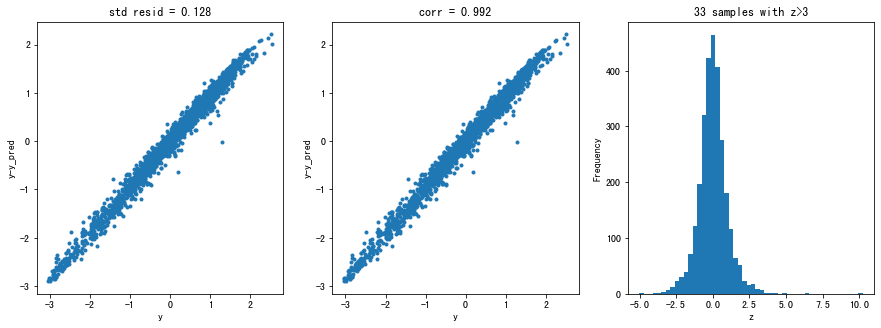

In [55]:
from sklearn.ensemble import RandomForestRegressor
model = 'RandomFores'
opt_models[model] = RandomForestRegressor()

param_grid = {'n_estimators':[150,250,350],
              'max_features':[8,12,16,20,24],
              'min_samples_split':[2,4,6]
             }

opt_models[model], cv_score, grid_results = train_model(opt_models[model],X=X,y=y,
                                                       param_grid=param_grid,
                                                       splits=splits,repeats=repeats)
cv_score.name = model
score_models = score_models.append(cv_score)

In [56]:
def model_predict(test_data,test_y=[],stack=False):
    i=0
    y_predict_total=np.zeros((test_data.shape[0],))
    for model in opt_models.keys():
        if model != 'LinearSVR' and model != 'KNeighbors':
            y_predict = opt_models['model'].predict(test_data)
            y_predict_total += y_predict
            i += 1
        if len(test_y)>0:
            print('{}_mse'.format(model),mean_squared_error(y_predict,test_y))
    y_predict_mean = np.round(y_predict_total/i,3)
    if len(test_y)>0:
        print('mean_mse:',mean_squared_error(y_predict_mean,test_y))
    else:
        y_predict_mean = pd.Series(y_predict_mean)
        return y_predict_mean
model_predict(X_valid,y_valid)

NameError: name 'X_valid' is not defined

In [160]:
# 多模型融合stacking方法
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import xgboost
import lightgbm
from scipy import sparse
from icecream import ic


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def stacking_reg(clf,train_x,train_y,test_x,clf_name,kf,label_split=None):
    train = np.zeros((train_x.shape[0],1))
    test = np.zeros((test_x.shape[0],1))
    test_pre = np.empty((folds,test_x.shape[0],1))
    cv_scores = []
    for i, (train_index,test_index) in enumerate(kf.split(train_x,label_split)):
        tr_x = train_x[train_index]
        tr_y = train_y[train_index]
        te_x = train_x[test_index]
        te_y = train_y[test_index]
        
        if clf_name in ['rf','ada','gb','et','lr','lsvc','knn']:
            clf.fit(tr_x,tr_y)
            pre = clf.predict(te_x).reshape(-1,1)
            ic(pre,i)
            train[test_index] = pre
            test_pre[i,:] = clf.predict(test_x).reshape(-1,1)
            ic(test_pre,i)
            cv_scores.append(mean_squared_error(te_y,pre))
        elif clf_name in ['xgb']:
            train_matrix = clf.DMatrix(tr_x,label=tr_y,missing=-1)
            test_matrix = clf.DMatrix(te_x,label=te_y,missing=-1)
            r = clf.DMatrix(test_x,label=te_y)
            params = {
                'booster':'gbtree',
                'eval_metric':'rmse',
                'gama':1,
                'min_child_weight':1.5,
                'max_depth':5,
                'lambda':10,
                'subsample':0.7,
                'colsample_bytree':0.7,
                'colsample_bylevel':0.7,
                'eta':0.03,
                'tree_method':'exact',
                'seed':2017,
                'nthread':12
            }
            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix,'train'),(test_matrixa,'test')]
            if test_matrix:
                model = clf.train(
                    params,
                    train_matrix,
                    num_boost_round = num_round,
                    evals=watchlist,
                    early_stopping_rounds=early_stopping_rounds)
                pre = model.predict(te_x,
                                   ntree_limit=model.best_ntree_limit).reshape(-1,1)
                train[test_index] = pre
                test_pre[i,:] = model.predict(z,ntree_limit=model.best_ntree_limit).reshape(-1,1)
                cv_scores.append(mean_squared_error(te_y,pre))
            
        elif clf_name in ['lgb']:
            train_matrix = clf.Dataset(tr_x, label=tr_y)
            test_matrix = clf.Dataset(te_x, label=te_y)
            params = {
                'boosting_type':'gbdt',
                'objective':'regression_l2',
                'metric':'mse',
                'min_child_weight':1.5,
                'num_leaves':2**5,
                'lambda_12':10,
                'subsample':0.7,
                'colsample_bytree':0.7,
                'colsample_bylevel':0.7,
                'learning_rate':0.03,
                'tree_method':'exact',
                'seed':2017,
                'nthread':12,
                'silent':True
            }
            num_round = 10000
            early_stopping_rounds = 100
            if test_matrix:
                model = clf.train(
                    params,
                    train_matrix,
                    num_round,
                    valid_sets=test_matrix,
                    early_stopping_rounds=early_stopping_rounds
                )
                pre = model.predict(
                    te_x,
                    num_iteration=model.best_iteration).reshape(-1,1)
                train[test_index]=pre
                test_pre[i,:]=model.predict(
                    test_x,
                    num_iteration=model.best_iteration).reshape(-1,1)
                cv_scores.append(mean_squared_error(te_y,pre))
            else:
                raise IOError('Please add new clf.')
            print('%s now score is:'%clf_name, cv_scores)
        test[:] = test_pre.mean(axis=0)
        print('%s_score_list:'%clf_name,cv_scores)
        print('%s_score_mean:'%clf_name,np.mean(cv_scores))
        return train.reshape(-1,1),test.reshape(-1,1)
                

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [161]:
# stacking
%load_ext nb_black
def rf_reg(x_train, y_train, x_valid, kf, label_split=None):
    randomforest = RandomForestRegressor(n_estimators=600,
                                         max_depth=20,
                                         n_jobs=-1,
                                         random_state=2017,
                                         max_features='auto',
                                         verbose=1)
    rf_train, rf_test = stacking_reg(randomforest,
                                     x_train,
                                     y_train,
                                     x_valid,
                                     'rf',
                                     kf,
                                     label_split=label_split)
    return rf_train, rf_test, 'rf_reg'


def ada_reg(x_train, y_train, x_valid, kf, label_split=None):
    adaboost = AdaBoostRegressor(n_estimators=30,
                                 random_state=2017,
                                 learning_rate=0.01)
    aba_train, ada_test = stacking_reg(adaboost,
                                       x_train,
                                       y_train,
                                       x_valid,
                                       'ada',
                                       kf,
                                       label_split=label_split)
    return ada_train, ada_test, 'ada_reg'


def gb_reg(x_train, y_train, x_valid, kf, label_split=None):
    gbdt = GradientBoostingRegressor(n_estimators=100,
                                     random_state=2017,
                                     subsample=0.8,
                                     learning_rate=0.04,
                                     max_depth=5,
                                     verbose=1)
    gbdt_train, gbdt_test = stacking_reg(adaboost,
                                         x_train,
                                         y_train,
                                         x_valid,
                                         'gb',
                                         kf,
                                         label_split=label_split)
    return gbdt_train, gbdt_test, 'gbdt_reg'


def et_reg(x_train, y_train, x_valid, kf, label_split=None):
    extratree = ExtraTreesRegressor(n_estimators=600,
                                    random_state=2017,
                                    max_features='auto',
                                    max_depth=35,
                                    learning_rate=0.04,
                                    n_jobs=-1,
                                    verbose=1)
    et_train, et_test = stacking_reg(adaboost,
                                     x_train,
                                     y_train,
                                     x_valid,
                                     'et',
                                     kf,
                                     label_split=label_split)
    return et_train, et_test, 'et_reg'


def lr_reg(x_train, y_train, x_valid, kf, label_split=None):
    lr_reg = LinearRegression(n_jobs=-1)
    lr_train, lr_test = stacking_reg(lr_reg,
                                     x_train,
                                     y_train,
                                     x_valid,
                                     'lr',
                                     kf,
                                     label_split=label_split)
    return lr_train, lr_test, 'et_reg'


def xgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_reg(xgboost,
                                       x_train,
                                       y_train,
                                       x_valid,
                                       'lr',
                                       kf,
                                       label_split=label_split)
    return xgb_train, xgb_test, 'xgb_reg'


def lgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    lgb_train, lgb_test = stacking_reg(xgboost,
                                       x_train,
                                       y_train,
                                       x_valid,
                                       'lr',
                                       kf,
                                       label_split=label_split)
    return xgb_train, xgb_test, 'xgb_reg'


def stacking_pred(x_train, y_train,
                  x_valid, kf,
                  clf_list, label_split=None,
                  clf_fin='lgb',
                  if_concat_origin=True
                  ):
    for k, clf_list in enumerate(clf_list):
        clf_list = [clf_list]
        column_list = []
        train_data_list = []
        test_data_list = []
        for clf in clf_list:
            train_data, test_data, clf_name = clf(
                x_train,
                y_train,
                x_valid,
                kf,
                label_split=label_split
            )
            train_data_list.append(train_data)
            test_data_list.append(test_data)
            column_list.append('clf_%s' % (clf_name))
        train = np.concatenate(train_data_list, axis=1)
        test = np.concatenate(test_data_list, axis=1)

        if if_concat_origin:
            train = np.concatenate([x_train, train], axis=1)
            test = np.concatenate([x_valid, test], axis=1)
        print(x_train.shape)
        print(train.shape)
        print(clf_name)

        if clf_fin in ['rf', 'ada', 'gb', 'et', 'lr', 'lsvc', 'knn']:
            if clf_fin in ['rf']:
                clf = RandomForestRegressor(n_estimators=600,
                                            max_depth=20,
                                            n_jobs=-1,
                                            random_state=2017,
                                            max_features='auto',
                                            verbose=1)
            elif clf_fin in ['ada']:
                clf = AdaBoostRegressor(n_estimators=30,
                                        random_state=2017,
                                        learning_rate=0.01)

            elif clf_fin in ['gb']:
                clf = GradientBoostingRegressor(n_estimators=100,
                                                random_state=2017,
                                                subsample=0.8,
                                                learning_rate=0.04,
                                                max_depth=5,
                                                verbose=1)
            elif clf_fin in ['et']:
                clf = ExtraTreesRegressor(n_estimators=600,
                                          random_state=2017,
                                          max_features='auto',
                                          max_depth=35,
                                          learning_rate=0.04,
                                          n_jobs=-1,
                                          verbose=1)
            elif clf_fin in ['lr']:
                clf = LinearRegression(n_jobs=-1)
            clf.fit(train, y_train)
            pre = clf.predict(test).reshape(-1, 1)
            return pre
        elif clf_fin in ['xgb']:
            train_matrix = clf.DMatrix(train, label=y_train)
            test_matrix = clf.DMatrix(train, label=y_train)

            params = {
                'booster': 'gbtree',
                'eval_metric': 'rmse',
                'gama': 1,
                'min_child_weight': 1.5,
                'max_depth': 5,
                'lambda': 10,
                'subsample': 0.7,
                'colsample_bytree': 0.7,
                'colsample_bylevel': 0.7,
                'eta': 0.03,
                'tree_method': 'exact',
                'seed': 2017,
                'nthread': 12

            }
            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix, 'train'), (test_matrixa, 'test')]
            model = clf.train(
                params,
                train_matrix,
                num_boost_round=num_round,
                evals=watchlist,
                early_stopping_rounds=early_stopping_rounds)
            pre = model.predict(test,
                                ntree_limit=model.best_ntree_limit).reshape(-1, 1)
            return pre
        elif clf_fin in ['lgb']:
            print(clf_name)
            clf = lightgbm
            train_matrix = clf.Dataset(train, label=y_train)
            test_matrix = clf.Dataset(train, label=y_train)
            params = {
                'boosting_type':'gbdt',
                'objective':'regression_l2',
                'metric':'mse',
                'min_child_weight':1.5,
                'num_leaves':2**5,
                'lambda_l2':10,
                'subsample':0.7,
                'colsample_bytree':0.7,
                'colsample_bynode':0.7,
                'learning_rate':0.03,
                'bagging_fraction': 0.8,
                'seed':2017,
                'nthread':12,
                'silent':True
            }
        
            num_round = 10000
            early_stopping_rounds = 1000
            model = clf.train(
                params,
                train_matrix,
                valid_sets=test_matrix,
                early_stopping_rounds=early_stopping_rounds)
            print('pred')
            pre = model.predict(test,
                                num_iteration=model.best_iteration).reshape(-1, 1)
            print(pre)
            return pre


The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
# 加载数据
with open('./zhengqi_train.txt') as fr:
    data_train = pd.read_table(fr,sep='\t')
with open('./zhengqi_test.txt') as fr:
    data_test = pd.read_table(fr,sep='\t')

from sklearn.model_selection import StratifiedKFold,KFold
folds = 5
seed = 1
kf =KFold(n_splits=5,shuffle=True,random_state=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
x_train =data_train[data_test.columns].values
x_valid = data_test[data_test.columns].values
y_train = data_train['target'].values
clf_list = [lr_reg,lgb_reg]

lgb = stacking_pred(x_train,y_train,x_valid,kf,clf_list,label_split=None,clf_fin='lgb',if_concat_origin=True)

ic| pre: array([[ 1.1007613 ],
                [ 1.14773604],
                [-0.34240494],
                [-1.19992937],
                [ 0.67226045],
                [-0.02050464],
                [ 1.02665935],
                [ 0.3899318 ],
                [-0.50431216],
                [-0.04333676],
                [ 1.04125475],
                [ 0.15858037],
                [ 0.55821467],
                [-0.65412322],
                [ 1.16664637],
                [ 0.61215957],
                [ 1.05261068],
                [ 0.85048449],
                [-1.24539351],
                [ 0.61538951],
                [ 0.55968064],
                [ 0.5741865 ],
                [ 1.09078675],
                [ 0.34555541],
                [-1.20151653],
                [-1.70554333],
                [-2.12650269],
                [ 0.35310321],
                [-0.02878282],
                [ 0.74239007],
                [-0.13201433],
                [ 0.42283206],
        

lr_score_list: [0.11573216950871244]
lr_score_mean: 0.11573216950871244
(2888, 38)
(2888, 39)
et_reg
et_reg
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9064
[LightGBM] [Info] Number of data points in the train set: 2888, number of used features: 39
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=0.7 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Start training from score 0.126353
[1]	valid_0's l2: 0.923667
Training until validation sco

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>